In [215]:
import findspark
findspark.init()

import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

dataframe_mysql = spark.read.format("jdbc").options(
    url="jdbc:mysql://localhost:3306/BDA",
    driver = "com.mysql.jdbc.Driver",
    dbtable = "mytable",
    user="root",
    password="jaya3502").load()
dataframe_mysql.show()

+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
| Loan_ID|Gender|Married|Dependents|   Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|
+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
|LP001002|  Male|     No|         0|    Graduate|           No|           5849|             0E-8|      null|             360|          true|        Urban|          Y|
|LP001003|  Male|    Yes|         1|    Graduate|           No|           4583|    1508.00000000|       128|             360|          true|        Rural|          N|
|LP001005|  Male|    Yes|         0|    Graduate|          Yes|           3000|             0E-8|        66|             360|          true|        Urban|          Y

In [216]:
spark.conf.set("spark.sql.execution.arrow.enabled", "true")
spark.conf.set("spark.sql.crossJoin.enabled", "true")
print(dataframe_mysql.toPandas().shape)

(614, 13)


In [217]:
dataframe_mysql.printSchema()

root
 |-- Loan_ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Married: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Self_Employed: string (nullable = true)
 |-- ApplicantIncome: integer (nullable = true)
 |-- CoapplicantIncome: decimal(13,8) (nullable = true)
 |-- LoanAmount: integer (nullable = true)
 |-- Loan_Amount_Term: integer (nullable = true)
 |-- Credit_History: boolean (nullable = true)
 |-- Property_Area: string (nullable = true)
 |-- Loan_Status: string (nullable = true)



In [218]:
dataframe_mysql.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Loan_ID,614,None,None,LP001002,LP002990
Gender,601,None,None,Female,Male
Married,611,None,None,No,Yes
Dependents,599,0.5547445255474452,0.7853289861674311,0,3+
Education,614,None,None,Graduate,Not Graduate
Self_Employed,582,None,None,No,Yes
ApplicantIncome,614,5403.459283387622,6109.041673387181,150,81000
CoapplicantIncome,614,1621.245798027101,2926.2483692241894,0E-8,41667.00000000
LoanAmount,592,146.41216216216216,85.58732523570545,9,700


In [219]:

from pyspark.sql.functions import col, when
dataframe_mysql = dataframe_mysql.withColumn(dataframe_mysql.columns[1], when(col(dataframe_mysql.columns[1]) == "Male", 1).otherwise(0))
dataframe_mysql = dataframe_mysql.withColumn(dataframe_mysql.columns[2], when(col(dataframe_mysql.columns[2]) == "Yes", 1).otherwise(0))
dataframe_mysql = dataframe_mysql.withColumn(dataframe_mysql.columns[4], when(col(dataframe_mysql.columns[4]) == "Graduate", 1).otherwise(0))
dataframe_mysql = dataframe_mysql.withColumn(dataframe_mysql.columns[5], when(col(dataframe_mysql.columns[5]) == "Yes", 1).otherwise(0))
dataframe_mysql = dataframe_mysql.withColumn(dataframe_mysql.columns[10], when(col(dataframe_mysql.columns[10]) == "true", 1).otherwise(0))
dataframe_mysql = dataframe_mysql.withColumn(dataframe_mysql.columns[11], when(col(dataframe_mysql.columns[11]) == "Urban", 1).otherwise(0))
dataframe_mysql = dataframe_mysql.withColumn(dataframe_mysql.columns[12], when(col(dataframe_mysql.columns[12]) == "Y", 1).otherwise(0))
dataframe_mysql=dataframe_mysql.na.replace('0E-8', '0')
dataframe_mysql.show(5)

+--------+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
| Loan_ID|Gender|Married|Dependents|Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|
+--------+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
|LP001002|     1|      0|         0|        1|            0|           5849|             0E-8|      null|             360|             1|            1|          1|
|LP001003|     1|      1|         1|        1|            0|           4583|    1508.00000000|       128|             360|             1|            0|          0|
|LP001005|     1|      1|         0|        1|            1|           3000|             0E-8|        66|             360|             1|            1|          1|
|LP001006|     1

In [220]:
dataframe_mysql = dataframe_mysql.withColumn("Dependents", \
              when(dataframe_mysql["Dependents"] == "3+", 3).otherwise(dataframe_mysql["Dependents"]))
dataframe_mysql=dataframe_mysql.na.drop()
dataframe_mysql.show()

+--------+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
| Loan_ID|Gender|Married|Dependents|Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|
+--------+------+-------+----------+---------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
|LP001003|     1|      1|         1|        1|            0|           4583|    1508.00000000|       128|             360|             1|            0|          0|
|LP001005|     1|      1|         0|        1|            1|           3000|             0E-8|        66|             360|             1|            1|          1|
|LP001006|     1|      1|         0|        0|            0|           2583|    2358.00000000|       120|             360|             1|            1|          1|
|LP001008|     1

In [221]:
dataframe_mysql = dataframe_mysql.drop(col("Loan_ID")) 
dataframe_mysql.printSchema()

root
 |-- Gender: integer (nullable = false)
 |-- Married: integer (nullable = false)
 |-- Dependents: string (nullable = true)
 |-- Education: integer (nullable = false)
 |-- Self_Employed: integer (nullable = false)
 |-- ApplicantIncome: integer (nullable = true)
 |-- CoapplicantIncome: decimal(13,8) (nullable = true)
 |-- LoanAmount: integer (nullable = true)
 |-- Loan_Amount_Term: integer (nullable = true)
 |-- Credit_History: integer (nullable = false)
 |-- Property_Area: integer (nullable = false)
 |-- Loan_Status: integer (nullable = false)



In [222]:
dataframe_mysql.printSchema()

root
 |-- Gender: integer (nullable = false)
 |-- Married: integer (nullable = false)
 |-- Dependents: string (nullable = true)
 |-- Education: integer (nullable = false)
 |-- Self_Employed: integer (nullable = false)
 |-- ApplicantIncome: integer (nullable = true)
 |-- CoapplicantIncome: decimal(13,8) (nullable = true)
 |-- LoanAmount: integer (nullable = true)
 |-- Loan_Amount_Term: integer (nullable = true)
 |-- Credit_History: integer (nullable = false)
 |-- Property_Area: integer (nullable = false)
 |-- Loan_Status: integer (nullable = false)



In [223]:
from pyspark.sql.types import IntegerType
dataframe_mysql = dataframe_mysql.withColumn("Dependents",dataframe_mysql["Dependents"].cast(IntegerType()))
dataframe_mysql.printSchema()

root
 |-- Gender: integer (nullable = false)
 |-- Married: integer (nullable = false)
 |-- Dependents: integer (nullable = true)
 |-- Education: integer (nullable = false)
 |-- Self_Employed: integer (nullable = false)
 |-- ApplicantIncome: integer (nullable = true)
 |-- CoapplicantIncome: decimal(13,8) (nullable = true)
 |-- LoanAmount: integer (nullable = true)
 |-- Loan_Amount_Term: integer (nullable = true)
 |-- Credit_History: integer (nullable = false)
 |-- Property_Area: integer (nullable = false)
 |-- Loan_Status: integer (nullable = false)



In [224]:
dataframe_mysql.printSchema()

root
 |-- Gender: integer (nullable = false)
 |-- Married: integer (nullable = false)
 |-- Dependents: integer (nullable = true)
 |-- Education: integer (nullable = false)
 |-- Self_Employed: integer (nullable = false)
 |-- ApplicantIncome: integer (nullable = true)
 |-- CoapplicantIncome: decimal(13,8) (nullable = true)
 |-- LoanAmount: integer (nullable = true)
 |-- Loan_Amount_Term: integer (nullable = true)
 |-- Credit_History: integer (nullable = false)
 |-- Property_Area: integer (nullable = false)
 |-- Loan_Status: integer (nullable = false)



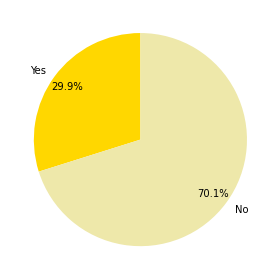

In [225]:
# dataframe_mysql = dataframe_mysql.selectExpr("cast(Dependents as int) Dependents")
# dataframe_mysql.printSchema()
labels = ['Yes', 'No']
sizes = [dataframe_mysql.filter(dataframe_mysql['Loan_Status'] == 0).select('Loan_Status').count(), dataframe_mysql.filter(dataframe_mysql['Loan_Status'] == 1).select('Loan_Status').count()]
colors = ['#FFD700','#EEE8AA']

plt.pie(sizes, colors = colors, labels=labels, autopct='%.1f%%', startangle=90, pctdistance=0.85)
fig = plt.gcf()
plt.tight_layout()
plt.show()

In [226]:
features = dataframe_mysql.drop('Loan_Status')

In [227]:
#let's assemble our features together using vectorAssembler
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(
    inputCols=features.columns,
    outputCol="features")

In [228]:
output = assembler.transform(dataframe_mysql)

In [229]:
output= output.select("features", "Loan_Status")

In [230]:
train_df,test_df = output.randomSplit([0.7, 0.3])

In [231]:
print("Training Dataset Count: " + str(train_df.count()))
print("Test Dataset Count: " + str(test_df.count()))

Training Dataset Count: 393
Test Dataset Count: 173


In [232]:
# train_df.show()
# test_df.show()

Logistic Regression Model

In [233]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'Loan_Status', maxIter=10)
lrModel = lr.fit(train_df)

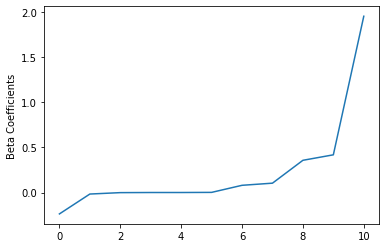

In [234]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

C:\spark-3.2.1-bin-hadoop3.2\python\pyspark\sql\context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


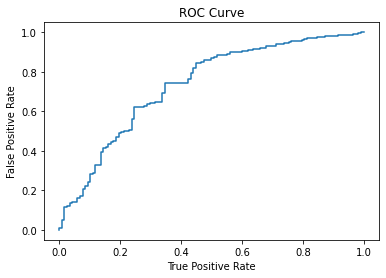

Training set areaUnderROC: 0.7331587057010783


In [235]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

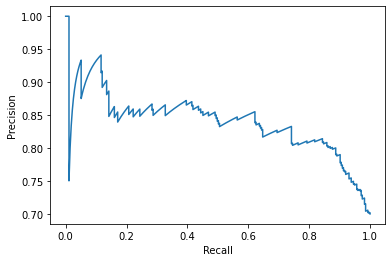

In [236]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [237]:
predictions = lrModel.transform(test_df)
predictions.select("features","Loan_status","rawPrediction","probability","prediction").show()

+--------------------+-----------+--------------------+--------------------+----------+
|            features|Loan_status|       rawPrediction|         probability|prediction|
+--------------------+-----------+--------------------+--------------------+----------+
|(11,[0,1,2,5,7,8]...|          0|[0.33537238918232...|[0.58306598482645...|       0.0|
|(11,[0,1,5,6,7,8]...|          0|[0.94925665286205...|[0.72096566033998...|       0.0|
|(11,[0,1,5,7,8],[...|          1|[0.63644603939547...|[0.65394964171098...|       0.0|
|(11,[0,1,5,7,8,9]...|          0|[-1.2978104025503...|[0.21453375325396...|       1.0|
|(11,[0,1,5,7,8,10...|          0|[0.83358511634954...|[0.69711244975221...|       0.0|
|(11,[0,2,3,5,7,8]...|          0|[0.66515007035290...|[0.66041632965737...|       0.0|
|(11,[0,2,3,5,7,8]...|          0|[0.43866777401243...|[0.60794154221884...|       0.0|
|(11,[0,3,5,6,7,8]...|          0|[0.87373594276126...|[0.70552247490165...|       0.0|
|(11,[0,3,5,7,8],[...|          

In [238]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="Loan_Status")
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.7267759562841528


In [239]:
lrpredictB = predictions[predictions.prediction==0].toPandas()
lrpredictM = predictions[predictions.prediction==1].toPandas()

C:\spark-3.2.1-bin-hadoop3.2\python\pyspark\sql\pandas\conversion.py:87: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


In [240]:
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
result = pd.concat([lrpredictB,lrpredictM])
true_labels=(test_df.select("Loan_Status")).toPandas()
predicted_labels=predictions.select("prediction").toPandas()

print("-- Logistic Regression --")
print("------------------------------------------------------------------------")
print("Classification Report\n",classification_report(true_labels, predicted_labels))
print("------------------------------------------------------------------------")
print("Confusion matrix\n",confusion_matrix(true_labels,predicted_labels),"\n\n")
LR=confusion_matrix(true_labels,predicted_labels)

-- Logistic Regression --
------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.61      0.53      0.57        51
           1       0.81      0.86      0.84       122

    accuracy                           0.76       173
   macro avg       0.71      0.70      0.70       173
weighted avg       0.75      0.76      0.76       173

------------------------------------------------------------------------
Confusion matrix
 [[ 27  24]
 [ 17 105]] 




In [241]:
def accuracy_m(model): 
    predictions = model.transform(test_df)
    cm = predictions.select("Loan_Status", "prediction")
    acc = cm.filter(cm.Loan_Status == cm.prediction).count() / cm.count()
    x = ("Model accuracy: %.3f%%" % (acc * 100)) 
    return x



In [242]:
x = accuracy_m(model = lrModel)
print(x)

Model accuracy: 76.301%


Decision Tree Classifier


In [243]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'Loan_Status', maxDepth = 3)
dtModel = dt.fit(train_df)

In [244]:
predictions = dtModel.transform(test_df)
predictions.select('features', 'Loan_Status', 'rawPrediction', 'probability', 'prediction').show(10)

+--------------------+-----------+-------------+--------------------+----------+
|            features|Loan_Status|rawPrediction|         probability|prediction|
+--------------------+-----------+-------------+--------------------+----------+
|(11,[0,1,2,5,7,8]...|          0|  [43.0,16.0]|[0.72881355932203...|       0.0|
|(11,[0,1,5,6,7,8]...|          0|  [43.0,16.0]|[0.72881355932203...|       0.0|
|(11,[0,1,5,7,8],[...|          1|  [43.0,16.0]|[0.72881355932203...|       0.0|
|(11,[0,1,5,7,8,9]...|          0| [65.0,248.0]|[0.20766773162939...|       1.0|
|(11,[0,1,5,7,8,10...|          0|  [43.0,16.0]|[0.72881355932203...|       0.0|
|(11,[0,2,3,5,7,8]...|          0|  [43.0,16.0]|[0.72881355932203...|       0.0|
|(11,[0,2,3,5,7,8]...|          0|    [8.0,9.0]|[0.47058823529411...|       1.0|
|(11,[0,3,5,6,7,8]...|          0|    [8.0,9.0]|[0.47058823529411...|       1.0|
|(11,[0,3,5,7,8],[...|          1|  [43.0,16.0]|[0.72881355932203...|       0.0|
|(11,[0,3,5,7,8],[...|      

In [245]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="Loan_Status")
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.7042751526840244


In [246]:
dtpredictB = predictions[predictions.prediction==0].toPandas()
dtpredictM = predictions[predictions.prediction==1].toPandas()

C:\spark-3.2.1-bin-hadoop3.2\python\pyspark\sql\pandas\conversion.py:87: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


In [247]:
result = pd.concat([dtpredictB,dtpredictM])
true_labels=(test_df.select("Loan_Status")).toPandas()
predicted_labels=predictions.select("prediction").toPandas()

print("-- Decision Tree Classifier --")
print("------------------------------------------------------------------------")
print("Classification Report\n",classification_report(true_labels, predicted_labels))
print("------------------------------------------------------------------------")
print("Confusion matrix\n",confusion_matrix(true_labels,predicted_labels),"\n\n")
DT=confusion_matrix(true_labels,predicted_labels)

-- Decision Tree Classifier --
------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.62      0.39      0.48        51
           1       0.78      0.90      0.84       122

    accuracy                           0.75       173
   macro avg       0.70      0.65      0.66       173
weighted avg       0.73      0.75      0.73       173

------------------------------------------------------------------------
Confusion matrix
 [[ 20  31]
 [ 12 110]] 




In [248]:
x = accuracy_m(model = dtModel)
print(x)

Model accuracy: 75.145%


Random Forest Classifier

In [250]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'Loan_Status')
rfModel = rf.fit(train_df)

In [251]:
predictions = rfModel.transform(test_df)
predictions.select('features', 'Loan_Status', 'rawPrediction', 'probability', 'prediction').show()

+--------------------+-----------+--------------------+--------------------+----------+
|            features|Loan_Status|       rawPrediction|         probability|prediction|
+--------------------+-----------+--------------------+--------------------+----------+
|(11,[0,1,2,5,7,8]...|          0|[7.99812075109823...|[0.39990603755491...|       1.0|
|(11,[0,1,5,6,7,8]...|          0|[11.4747434112265...|[0.57373717056132...|       0.0|
|(11,[0,1,5,7,8],[...|          1|[10.9206990346727...|[0.54603495173363...|       0.0|
|(11,[0,1,5,7,8,9]...|          0|[4.62925274072993...|[0.23146263703649...|       1.0|
|(11,[0,1,5,7,8,10...|          0|[12.2962683928507...|[0.61481341964253...|       0.0|
|(11,[0,2,3,5,7,8]...|          0|[13.6933123009964...|[0.68466561504982...|       0.0|
|(11,[0,2,3,5,7,8]...|          0|[9.41512602533888...|[0.47075630126694...|       1.0|
|(11,[0,3,5,6,7,8]...|          0|[11.5823646088145...|[0.57911823044072...|       0.0|
|(11,[0,3,5,7,8],[...|          

In [252]:
evaluator = BinaryClassificationEvaluator(labelCol="Loan_Status")
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.6877209900353581


In [253]:
rfpredictB = predictions[predictions.prediction==0].toPandas()
rfpredictM = predictions[predictions.prediction==1].toPandas()

C:\spark-3.2.1-bin-hadoop3.2\python\pyspark\sql\pandas\conversion.py:87: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


In [254]:
result = pd.concat([rfpredictB,rfpredictM])
true_labels=(test_df.select("Loan_Status")).toPandas()
predicted_labels=predictions.select("prediction").toPandas()

print("-- Random Forest Classifier --")
print("------------------------------------------------------------------------")
print("Classification Report\n",classification_report(true_labels, predicted_labels))
print("------------------------------------------------------------------------")
print("Confusion matrix\n",confusion_matrix(true_labels,predicted_labels),"\n\n")
DT=confusion_matrix(true_labels,predicted_labels)

-- Random Forest Classifier --
------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.57      0.41      0.48        51
           1       0.78      0.87      0.82       122

    accuracy                           0.73       173
   macro avg       0.67      0.64      0.65       173
weighted avg       0.72      0.73      0.72       173

------------------------------------------------------------------------
Confusion matrix
 [[ 21  30]
 [ 16 106]] 




In [255]:
x = accuracy_m(model = rfModel)
print(x)

Model accuracy: 73.410%


Multilayered Perceptron

In [273]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
layers = [11, 256,128,64, 32,16,8,2]
trainer = MultilayerPerceptronClassifier(labelCol="Loan_Status",maxIter=100, layers=layers, blockSize=128, seed=1234)
mpModel = trainer.fit(train_df)


In [274]:
predictions = mpModel.transform(test_df)
predictions.select('features', 'Loan_Status', 'rawPrediction', 'probability', 'prediction').show()

+--------------------+-----------+--------------------+--------------------+----------+
|            features|Loan_Status|       rawPrediction|         probability|prediction|
+--------------------+-----------+--------------------+--------------------+----------+
|(11,[0,1,2,5,7,8]...|          0|[-1.3691425464034...|[0.28257610633905...|       1.0|
|(11,[0,1,5,6,7,8]...|          0|[-1.1758537140704...|[0.37817317999028...|       1.0|
|(11,[0,1,5,7,8],[...|          1|[-1.3013706645109...|[0.31452302366872...|       1.0|
|(11,[0,1,5,7,8,9]...|          0|[-1.3691386446944...|[0.28257788917434...|       1.0|
|(11,[0,1,5,7,8,10...|          0|[-1.3691505916741...|[0.28257242989593...|       1.0|
|(11,[0,2,3,5,7,8]...|          0|[-1.4096673091973...|[0.26442931303974...|       1.0|
|(11,[0,2,3,5,7,8]...|          0|[-1.1674043701555...|[0.38281812482790...|       1.0|
|(11,[0,3,5,6,7,8]...|          0|[-1.1250706571716...|[0.40539541056792...|       1.0|
|(11,[0,3,5,7,8],[...|          

In [275]:
evaluator = BinaryClassificationEvaluator(labelCol="Loan_Status")
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.6055930568948892


In [276]:
mppredictB = predictions[predictions.prediction==0].toPandas()
mppredictM = predictions[predictions.prediction==1].toPandas()

C:\spark-3.2.1-bin-hadoop3.2\python\pyspark\sql\pandas\conversion.py:87: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


In [277]:
result = pd.concat([mppredictB,mppredictM])
true_labels=(test_df.select("Loan_Status")).toPandas()
predicted_labels=predictions.select("prediction").toPandas()

print("-- Multilayered Perceptron --")
print("------------------------------------------------------------------------")
print("Classification Report\n",classification_report(true_labels, predicted_labels))
print("------------------------------------------------------------------------")
print("Confusion matrix\n",confusion_matrix(true_labels,predicted_labels),"\n\n")
DT=confusion_matrix(true_labels,predicted_labels)

-- Multilayered Perceptron --
------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.25      0.02      0.04        51
           1       0.70      0.98      0.82       122

    accuracy                           0.69       173
   macro avg       0.48      0.50      0.43       173
weighted avg       0.57      0.69      0.59       173

------------------------------------------------------------------------
Confusion matrix
 [[  1  50]
 [  3 119]] 




In [278]:
x = accuracy_m(model = mpModel)
print(x)

Model accuracy: 69.364%


In [ ]:
spark.stop()